# Linear Regression with Multiple Variables

In [20]:
import pandas as pd
import numpy as np
from __future__ import division
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("E:\\Machine Learning\\1\\ex1data2.csv")
data1.head()

,X1,X2,Y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [39]:
X1 = np.transpose(np.mat(data1["X1"]))
X2 = np.transpose(np.mat(data1["X2"]))
X_mat = np.hstack((X1, X2))
Y_mat = np.transpose(np.mat(data1["Y"]))
m = len(Y_mat)


In [40]:
def featureNormalize(X):
    mu = np.mat(np.zeros(np.shape(X)[1]))
    sigma = np.mat(np.zeros(np.shape(X)[1]))
    n = np.shape(mu)[1]
    X_norm = np.mat(np.zeros((m, n)))
    
    for j in range(0, n, 1):
        X_norm[:, j] = (X[:, j] - np.mean(X[:, j])) / np.std(X[:, j])
    
    
    return X_norm

In [50]:
X_norm = featureNormalize(X_mat)

ones = np.transpose(np.mat(np.ones(m)))
X_norm_ones = np.hstack((ones, X_norm))

In [51]:
def costFunctionMulti(X, Y, theta):
    Y_predict = X * theta
    cost = 1/(2*m) * sum(np.power(Y_predict - Y, 2))
    
    return cost[0, 0]

In [75]:
def gradientDescMulti(X, Y, theta, alpha, iterations):
    Y_predict = X * theta
    J = 1/(2*m) * sum(np.power(Y_predict - Y, 2))
    G_theta = np.zeros((len(theta), 1))
    
    theta_list = [theta]
    J_list = [J[0, 0]]
    
    while len(J_list) < iterations:
        for j in range(0, len(G_theta), 1):
            G_theta[j, :] = 1/m * sum(np.multiply(Y_predict - Y, X[:, j]))
        
        theta = theta - alpha * G_theta
        theta_list.append(theta)
        Y_predict = X * theta
        J = 1/(2*m) * sum(np.power(Y_predict - Y, 2))
        J_list.append(J[0, 0])
    
    
    return theta, theta_list, J_list

In [77]:
theta = np.transpose(np.mat([0, 0, 0]))

theta_optimum = gradientDescMulti(X_norm_ones, Y_mat, theta, 0.01, 400)[0]
theta_list = gradientDescMulti(X_norm_ones, Y_mat, theta, 0.01, 400)[1]
J_list = gradientDescMulti(X_norm_ones, Y_mat, theta, 0.01, 400)[2]

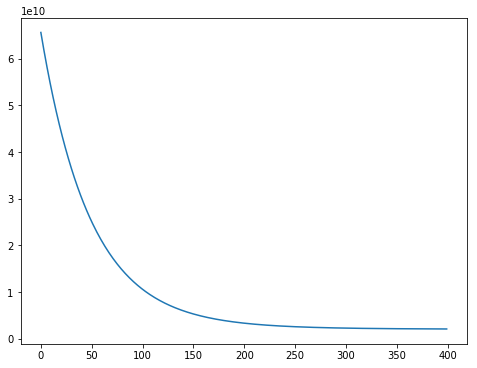

In [78]:
plt.figure(num = 1, figsize = (8, 6))

x_plot = np.arange(0, 400, 1)
y_plot = np.array(J_list)

plt.plot(x_plot, y_plot)